# CrySPY analyzer for RS

In [1]:
#---------- for python2
from __future__ import print_function

In [2]:
#---------- import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [3]:
#---------- setting for plot
plt.rcParams['pdf.fonttype'] = 42 # Type42はpdfにフォント埋め込み可能

In [4]:
#---------- If you don't use seaborn, comment out this cell
import seaborn as sns
sns.set_style('darkgrid', {'axes.edgecolor': 'black', 'axes.linewidth': 1.0})
sns.set_context('talk', font_scale=1.5)
#sns.set_palette('deep')
sns.set_palette("dark")

## Data

In [5]:
def load_rslt():
    with open('./pkl_data/rslt_data.pkl', 'rb') as rdata:
        rslt_data = pickle.load(rdata)
    return rslt_data

In [6]:
rslt_data = load_rslt()

#---------- sort by ID
#rslt_data.head(10)

#---------- sort by Energy
rslt_data.sort_values(by=['Energy']).head(10)

,Struc_ID,Spg_num,Spg_sym,Spg_num_opt,Spg_sym_opt,Energy,Magmom,Opt
13,13,92,P4_12_12,227,Fd-3m,-43.3714,NaN,done
6,3,194,P6_3/mmc,194,P6_3/mmc,-43.3402,NaN,done
14,14,229,Im-3m,229,Im-3m,-40.7942,NaN,done
17,17,79,I4,97,I422,-40.7119,NaN,done
7,4,139,I4/mmm,221,Pm-3m,-40.6634,NaN,done
8,5,205,Pa3,221,Pm-3m,-40.6576,NaN,done
10,8,34,Pnn2,136,P4_2/mnm,-40.5641,NaN,done
15,15,42,Fmm2,140,I4/mcm,-40.4593,NaN,done
16,16,70,Fddd,70,Fddd,-39.8497,NaN,done
11,10,139,I4/mmm,139,I4/mmm,-39.5391,NaN,done


In [7]:
#---------- Number of structures
ndata = len(rslt_data)
print('Number of data: {}'.format(ndata))

#---------- check success and error
nsuccess = rslt_data['Energy'].count()
nerror = ndata - nsuccess
print('Success: {}'.format(nsuccess))
print('Error: {}'.format(nerror))

#---------- minimum
Emin = rslt_data['Energy'].min()
print('Emin: {} eV'.format(Emin))

#---------- magmom (absolute value)
magmom = np.abs(rslt_data['Magmom'])
magmax = magmom.max()

Number of data: 20
Success: 17
Error: 3
Emin: -43.371357 eV


## Energy

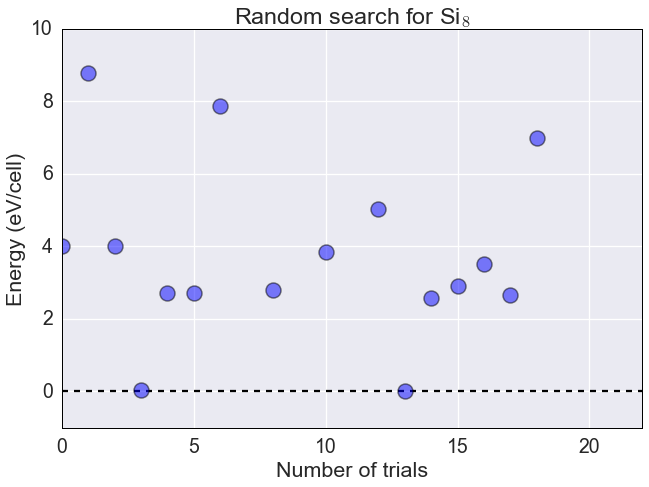

In [10]:
#---------- axis
plt.xlim([0, ndata+2])
plt.ylim([-1, 10])

#---------- hline at zero
plt.hlines(0.0, 0, 5000, 'k', '--')

#---------- plot
plt.plot(rslt_data['Struc_ID'],  rslt_data['Energy'] - Emin, 'ob', ms=15, mew=1.5, alpha=0.5)

#---------- title and label
plt.title('Random search for Si$_{8}$')
plt.xlabel('Number of trials')
plt.ylabel('Energy (eV/cell)')

#---------- save figure
#plt.savefig('Si8_RS.png', bbox_inches='tight')
#plt.savefig('Si8_RS.png', bbox_inches='tight', dpi=300)    # high dpi
#plt.savefig('Si8_RS.pdf', bbox_inches='tight', dpi=300)    # high dpi

## Energy vs Magmom

In [ ]:
#---------- plot
plt.xlim([0, magmax+2])
plt.ylim([-5, 30])

plt.plot(magmom, rslt_data['Energy'] - Emin, 'ob', ms=15, mew=1.5, alpha=0.5)

#---------- title and label
plt.title('Random search for Y$_2$Co$_{17}$')
plt.xlabel('Magnetic moment ($\mu_\mathrm{B}$/cell)')
plt.ylabel('Energy (eV/cell)')

#---------- save figure
#plt.savefig('Y2Co17_E_mag.png', bbox_inches='tight')
#plt.savefig('Y2Co17_E_mag.pdf', bbox_inches='tight', dpi=300)    # high dpi
#plt.savefig('Y2Co17_E_mag.png', bbox_inches='tight', dpi=300)    # high dpi